In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [43]:
df = pd.read_csv('Music Sales.csv', index_col=None)
df.head()
df.Country.value_counts()


USA               478
Canada            288
France            188
Brazil            183
Germany           142
United Kingdom    111
Czech Republic     74
Portugal           72
India              70
Sweden             38
Poland             38
Hungary            38
Austria            38
Chile              38
Denmark            38
Netherlands        38
Finland            38
Italy              38
Argentina          37
Norway             35
Spain              32
Belgium            31
Ireland            30
Australia          30
Name: Country, dtype: int64

**Sales in USA and Canada**

Draw the time series plot for sales in US and Canada

In [44]:
# the purpose of the Graph is to access the sales in USA and Canada, 
# so we filter the Country in USA and Canada
df_U_C = df[df['Country'].isin(['USA', 'Canada'])].copy()
df_U_C.head()
#df_U_C.info()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
12,Audioslave,Audioslave,6.32M,0.99,Edmonton,Telus,Audioslave/Chris Cornell,Canada,14,mphilips12@shaw.ca,...,MPEG audio file,263262,1,+1 (780) 434-4554,T6G 2C7,1,North America,AB,Set It Off,0.99
13,Plays Metallica By Four Cellos,Apocalyptica,14.38M,1.98,Edmonton,Telus,Apocalyptica,Canada,14,mphilips12@shaw.ca,...,MPEG audio file,436453,1,+1 (780) 434-4554,T6G 2C7,2,North America,AB,Master Of Puppets,0.99
14,Warner 25 Anos,AntÃ´nio Carlos Jobim,5.57M,2.97,Edmonton,Telus,NaN,Canada,14,mphilips12@shaw.ca,...,MPEG audio file,169508,1,+1 (780) 434-4554,T6G 2C7,3,North America,AB,Angela,0.99
15,Plays Metallica By Four Cellos,Apocalyptica,11.41M,2.97,Edmonton,Telus,Apocalyptica,Canada,14,mphilips12@shaw.ca,...,MPEG audio file,350197,1,+1 (780) 434-4554,T6G 2C7,3,North America,AB,Welcome Home (Sanitarium),0.99
16,Facelift,Alice In Chains,7.85M,2.97,Edmonton,Telus,Jerry Cantrell,Canada,14,mphilips12@shaw.ca,...,MPEG audio file,241946,1,+1 (780) 434-4554,T6G 2C7,3,North America,AB,Bleed The Freak,0.99


In [45]:
sns.set(style="darkgrid")

In [46]:
df_U_C['InvoiceDate'] = pd.to_datetime(df_U_C['InvoiceDate']) # convert the time

Text(0.5,1,'Sales in USA and Canada')

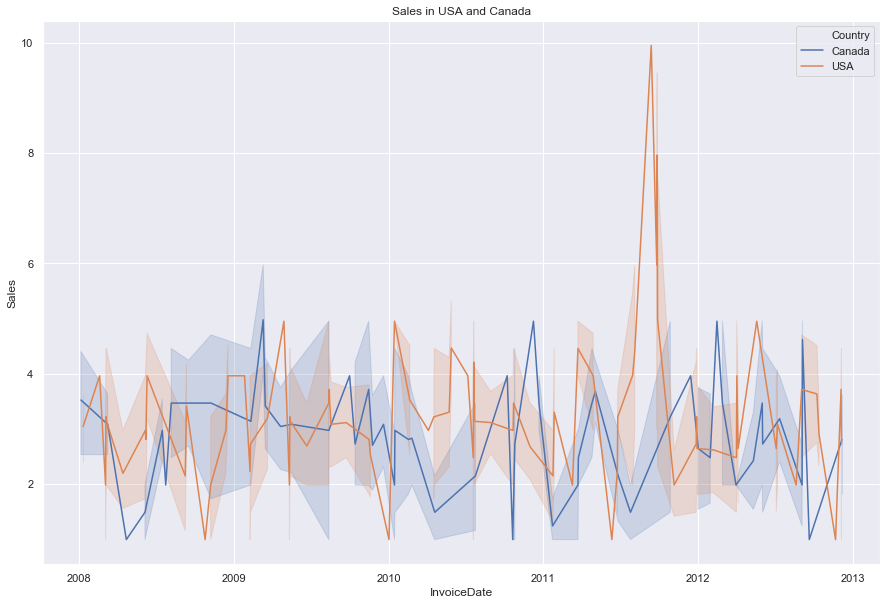

In [47]:
# draw the graph
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax = sns.lineplot(x='InvoiceDate', y='Sales', hue='Country', data=df_U_C, ax = ax) 
ax.set_title('Sales in USA and Canada')

**Rock music market share fluctuate in US in 2011 and 2012**

Through this graph, we will show how Rock music monthly market share fluctuate in US in 2011 and 2012. I will show the total sales of multiple genres monthly, then show sales of Rock monthly, then calculate the percent of the sales of Rock by the total sales of all genres monthly, then draw the graph.

In [48]:
# the purpose of the Graph is to access the sales in USA, so we filter the Country in USA.
df_US = df[df['Country'].isin(['USA'])].copy()
df_US.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
21,Alcohol Fueled Brewtality Live! [Disc 1],Black Label Society,10.51M,0.99,Boston,NaN,NaN,USA,23,johngordon22@yahoo.com,...,MPEG audio file,319373,1,+1 (617) 522-1333,2113,1,North America,MA,Super Terrorizer,0.99
22,Body Count,Body Count,5.46M,1.98,Boston,NaN,NaN,USA,23,johngordon22@yahoo.com,...,MPEG audio file,166426,1,+1 (617) 522-1333,2113,2,North America,MA,Body Count Anthem,0.99
23,Body Count,Body Count,7.32M,1.98,Boston,NaN,NaN,USA,23,johngordon22@yahoo.com,...,MPEG audio file,223216,1,+1 (617) 522-1333,2113,2,North America,MA,Bowels Of The Devil,0.99
24,The Best Of Buddy Guy - The Millenium Collection,Buddy Guy,7.69M,1.98,Boston,NaN,Al Perkins/Willie Dixon,USA,23,johngordon22@yahoo.com,...,MPEG audio file,235311,1,+1 (617) 522-1333,2113,2,North America,MA,When My Left Eye Jumps,0.99
25,The Best Of Billy Cobham,Billy Cobham,9.71M,1.98,Boston,NaN,Billy Cobham,USA,23,johngordon22@yahoo.com,...,MPEG audio file,294060,1,+1 (617) 522-1333,2113,2,North America,MA,Moon germs,0.99


In [49]:
df_US['InvoiceDate'] = pd.to_datetime(df_US['InvoiceDate']) # convert the time
df_US['Year'] = df_US['InvoiceDate'].dt.year
df_US['YearMonth'] = df_US['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m')) 
# Filter out the data which year is in 2011 and 2012
df_US_Year = df_US[df_US['Year'].isin(['2011','2012'])].copy()
# calculate the sales of all genres by month
df_US_Year_Salesbymonth = df_US_Year.groupby('YearMonth')['Sales'].sum() 
df_US_Year_Salesbymonth

YearMonth
2011-01    32.67
2011-03    10.89
2011-04    35.64
2011-06    22.77
2011-07    15.87
2011-08    52.67
2011-09    95.52
2011-11    27.72
2011-12    39.60
2012-02    36.63
2012-04    57.42
2012-05     4.95
2012-07    43.56
2012-08     1.98
2012-09    14.85
2012-10    73.26
2012-11     0.99
2012-12    25.74
Name: Sales, dtype: float64

In [50]:
df_US_Year.Genre.value_counts()
df_US_Year_Rock = df_US_Year[df_US_Year['Genre'].isin(['Rock'])].copy()   # Filter out the data whick Genre is Rock
#df_US_Year_Rock[['YearMonth','Sales']]
df_US_Year_Rock_Sales = df_US_Year_Rock.groupby('YearMonth')['Sales'].sum() # show the sales of Rock by month
df_US_Year_Rock_Sales

YearMonth
2011-01    10.89
2011-04    14.85
2011-06    18.81
2011-08    12.87
2011-11    13.86
2011-12    11.88
2012-02    23.76
2012-04    10.89
2012-09     1.98
2012-10    39.60
2012-11     0.99
2012-12    25.74
Name: Sales, dtype: float64

In [51]:
# Create a new data frame consist of the month and the percent of Rock sales monthly
df1 = pd.DataFrame()
df1['Month'] = df_US_Year_Salesbymonth.index
df1['Sales'] = df_US_Year_Salesbymonth.values
# manualy fill the 0 to the list which the sale of rock is null in several months
df1['SalesbyRock'] =[10.89,0,14.85,18.81,0,12.87,0,13.86,11.88,23.76,10.89,0,0,0,1.98,39.6,0.99,25.74]
# calculate the Rock market share monthly
df1['Sale_Percent_Rock'] = df1['SalesbyRock']/(df1['Sales']) * 100
df1['Sale_Percent_Rock']= round(df1['Sale_Percent_Rock'],3)
df1

,Month,Sales,SalesbyRock,Sale_Percent_Rock
0,2011-01,32.67,10.89,33.333
1,2011-03,10.89,0.00,0.000
2,2011-04,35.64,14.85,41.667
3,2011-06,22.77,18.81,82.609
4,2011-07,15.87,0.00,0.000
5,2011-08,52.67,12.87,24.435
6,2011-09,95.52,0.00,0.000
7,2011-11,27.72,13.86,50.000
8,2011-12,39.60,11.88,30.000
9,2012-02,36.63,23.76,64.865


Text(0.5,1,'Rock market share in USA in 2011 and 2012 by month')

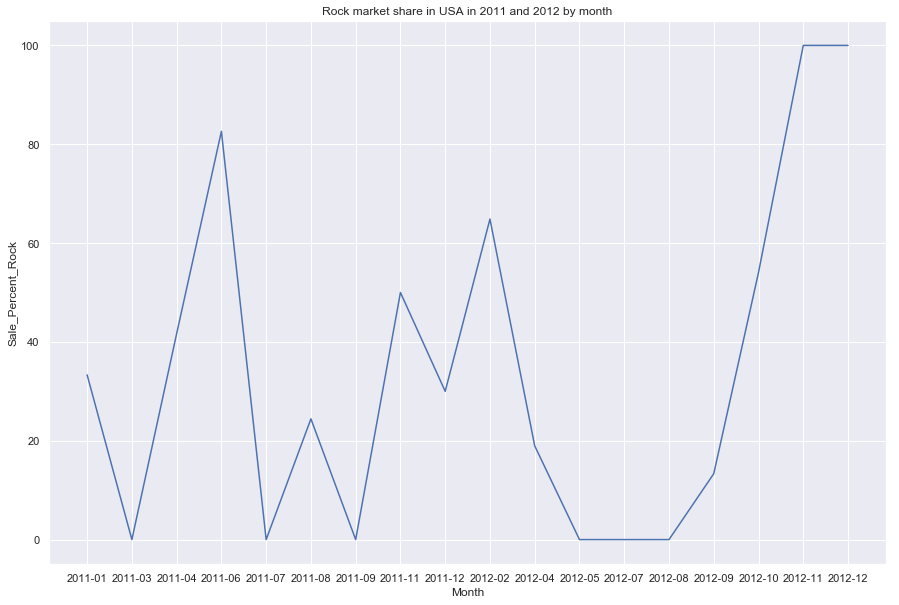

In [52]:
# Draw the graph
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
ax = sns.lineplot(x='Month', y='Sale_Percent_Rock', data= df1, ax = ax)
ax.set_title('Rock market share in USA in 2011 and 2012 by month')